# Segunda Prova de Processamento Digital de Imagens
## 24/11/16
#### Instruções:
* Desligue seu celular. Esta prova foi elaborada para ser feita em 100 minutos;
* A fraude ou a sua tentativa será punida com conceito F; 
* O aluno pode consultar qualquer coisa, porém, **não poderá trocar informações com pessoas. Proibido o uso de email, chats, whatsapp, skype, twitter, facebook, message, etc**. 
* A interpretação do enunciado faz parte da resposta, fundamente de maneira coerente.

In [1]:
def showfig(image, ucmap):
    imgplot=plt.imshow(image, ucmap)
# comentar esta linha para rodar do shell
get_ipython().magic(u'matplotlib inline')

import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

# conda create -n opencv numpy scipy scikit-learn matplotlib python=3
# conda install -c https://conda.binstar.org/menpo opencv3
import cv2

from wand.image import Image  # pip install Wand

## Ler um arquivo pdf e gerar uma imagem

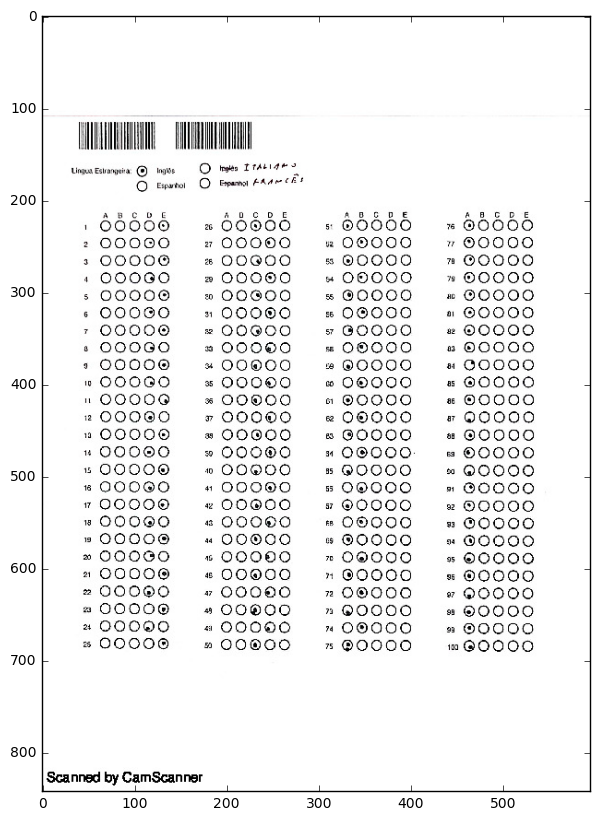

In [2]:
# ref: http://garmoncheg.blogspot.com.br/2013/07/python-converting-pdf-to-image.html

# convertendo pdf para JPG
with Image(filename="prova2.pdf[0]") as img:
     img.save(filename="temp.jpg")

Img = cv2.imread("temp.jpg")

plt.figure(figsize=(10,10))
showfig(Img,"gray")  

# Questão 1) Implemente abaixo a sua solução para segmentar os códigos de barras, salvando cada código em um arquivo (imagem) diferente, para serem decodificados como realizado na célula seguinte.
### Obs. os códigos de barras podem estar em quaisquer posições da folha


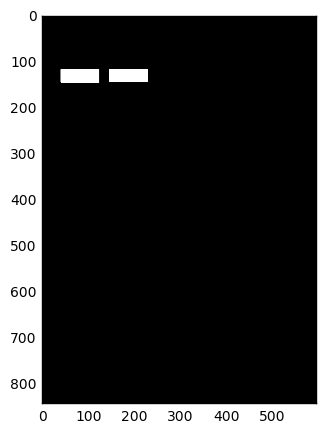

In [3]:
# sua segmentação dos códigos de barras

gray = cv2.cvtColor(Img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
img = cv2.GaussianBlur(gray, (7,7), 0) # filtro passa baixa - para borrar imagem
ret3,th3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((10,50),np.uint8)
opening = cv2.morphologyEx(255-th3, cv2.MORPH_OPEN, kernel)

# lista de objetos conexos
_, contours, _ = cv2.findContours(opening, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

plt.figure(figsize=(5,5))
showfig(opening>0,"gray") 

In [4]:
candidate = []
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.1*perimeter, True)
    if len(approx) == 4: # pego apenas os objetos com 4 lados
        approx = np.array(approx, dtype='float32').reshape(4,2)
        candidate = approx
        print (approx)
        #break

[[ 145.  117.]
 [ 145.  145.]
 [ 228.  145.]
 [ 228.  117.]]
[[  40.  118.]
 [  41.  146.]
 [ 123.  146.]
 [ 123.  117.]]


In [5]:
print (approx)

[[  40.  118.]
 [  41.  146.]
 [ 123.  146.]
 [ 123.  117.]]


In [6]:
print (np.float32([approx[0],approx[1],approx[2],approx[3]]))

[[  40.  118.]
 [  41.  146.]
 [ 123.  146.]
 [ 123.  117.]]


In [7]:
approx1 = np.float32([approx[1],approx[0],approx[3],approx[2]])

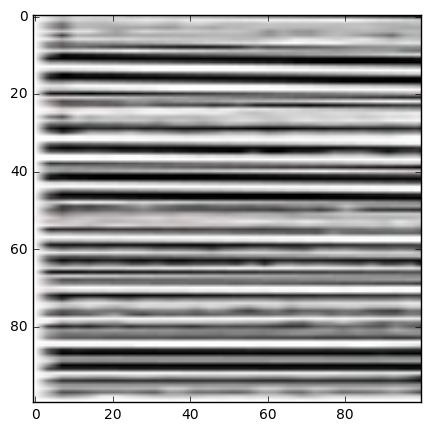

In [8]:
height, width = 100, 100
dst = np.array([[0,0],[width-1,0],[width-1,height-1],[0, height-1]],dtype='float32')
matrix = cv2.getPerspectiveTransform(approx1, dst)
#Perform perspective transform to get patch
patch = cv2.warpPerspective(Img, matrix, (height, width))
plt.figure(figsize=(5,5))
showfig(patch,"gray") 

# Para decodificar uma imagem de código de barras

QR codes: [b'0000000000055']


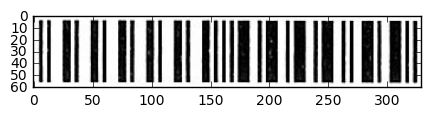

In [10]:
# ref: https://pypi.python.org/pypi/zbarlight/1.0.3.dev0
# recomendável tentar achar outras bibliotecas...
# on Debian, apt-get install libzbar0 libzbar-dev
# on Mac OS X, pip install zbarlight

from PIL import Image
import zbarlight
    
file_path = '_barcode.png'
with open(file_path, 'rb') as image_file:
    image = Image.open(image_file)
    image.load()
    # desejável chegar nesta imagem segmentada
    plt.figure(figsize=(5,5))
    showfig(image,"gray") 
    
codes = zbarlight.scan_codes('qrcode', image)
print('QR codes: %s' % codes)